In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

2024-01-16 10:48:14.111536: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-16 10:48:14.111583: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-16 10:48:14.111608: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-16 10:48:14.117721: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = load_model('temp/checkpoint/modclass04_2500.h5')

2024-01-16 10:48:16.792413: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 10:48:16.797809: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 10:48:16.797848: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 10:48:16.800114: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 10:48:16.800149: I tensorflow/compile

In [9]:
# label_names =  ['angry_alpaca_sas.tmp',
#                 'angry_bear_sas.tmp',
#                 'angry_bobcat_sas.tmp',
#                 'angry_camel_sas.tmp',
#                 'angry_cheetah_sas.tmp',
#                 'angry_deer_sas.tmp',
#                 'angry_dingo_a.tmp',
#                 'angry_goat_sas.tmp',
#                 'angry_gorilla_t.tmp',
#                 'angry_hare_sas.tmp',
#                 'angry_jackal_a.tmp',
#                 'angry_jaguar_sas.tmp',
#                 'angry_kangaroo_a.tmp',
#                 'angry_lion_t.tmp',
#                 'angry_mandrill_t.tmp',
#                 'angry_marmot_t.tmp',
#                 'angry_mink_sas.tmp',
#                 'angry_mole_t.tmp',
#                 'angry_mouse_t.tmp',
#                 'angry_puma_sas.tmp',
#                 'angry_rat_t.tmp',
#                 'angry_starling_ti.tmp',
#                 'angry_weasel_sas.tmp',
#                 'angry_wolf_sas.tmp',
#                 'angry_zebra_sas.tmp']

label_names = ['UNMOD',
               'LFM',
               'BARKER']

In [4]:
data = np.load('training_data/data04_test_2500.npy')
labels = np.load('training_data/labels04_test_2500.npy')

In [5]:
x = data
y = labels[:,2]

In [6]:
yh = model.predict(x).argmax(1)
prediction = pd.DataFrame()
prediction['yh'] = yh
prediction['y'] = y
ix = (prediction.y != prediction.yh)
print(ix.sum(),'testing mistakes of',len(ix),'total predictions')
print('test error rate',round(ix.sum()/len(ix),3))
print('Accuracy', round(1-ix.sum()/len(ix),3))

2024-01-16 10:48:21.357793: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 81920000 exceeds 10% of free system memory.
2024-01-16 10:48:21.457332: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 81920000 exceeds 10% of free system memory.
2024-01-16 10:48:22.879154: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


79/79 [==============================] - 6s 11ms/step
395 testing mistakes of 2500 total predictions
test error rate 0.158
Accuracy 0.842


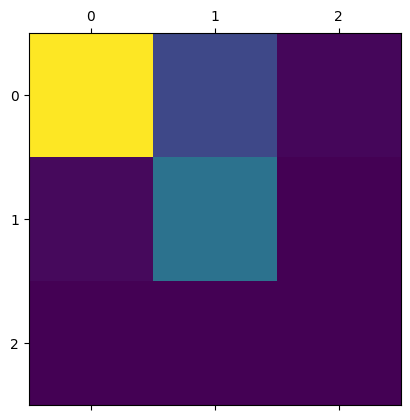

In [7]:
cm = confusion_matrix(y, yh)
plt.matshow(cm)
plt.show()

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

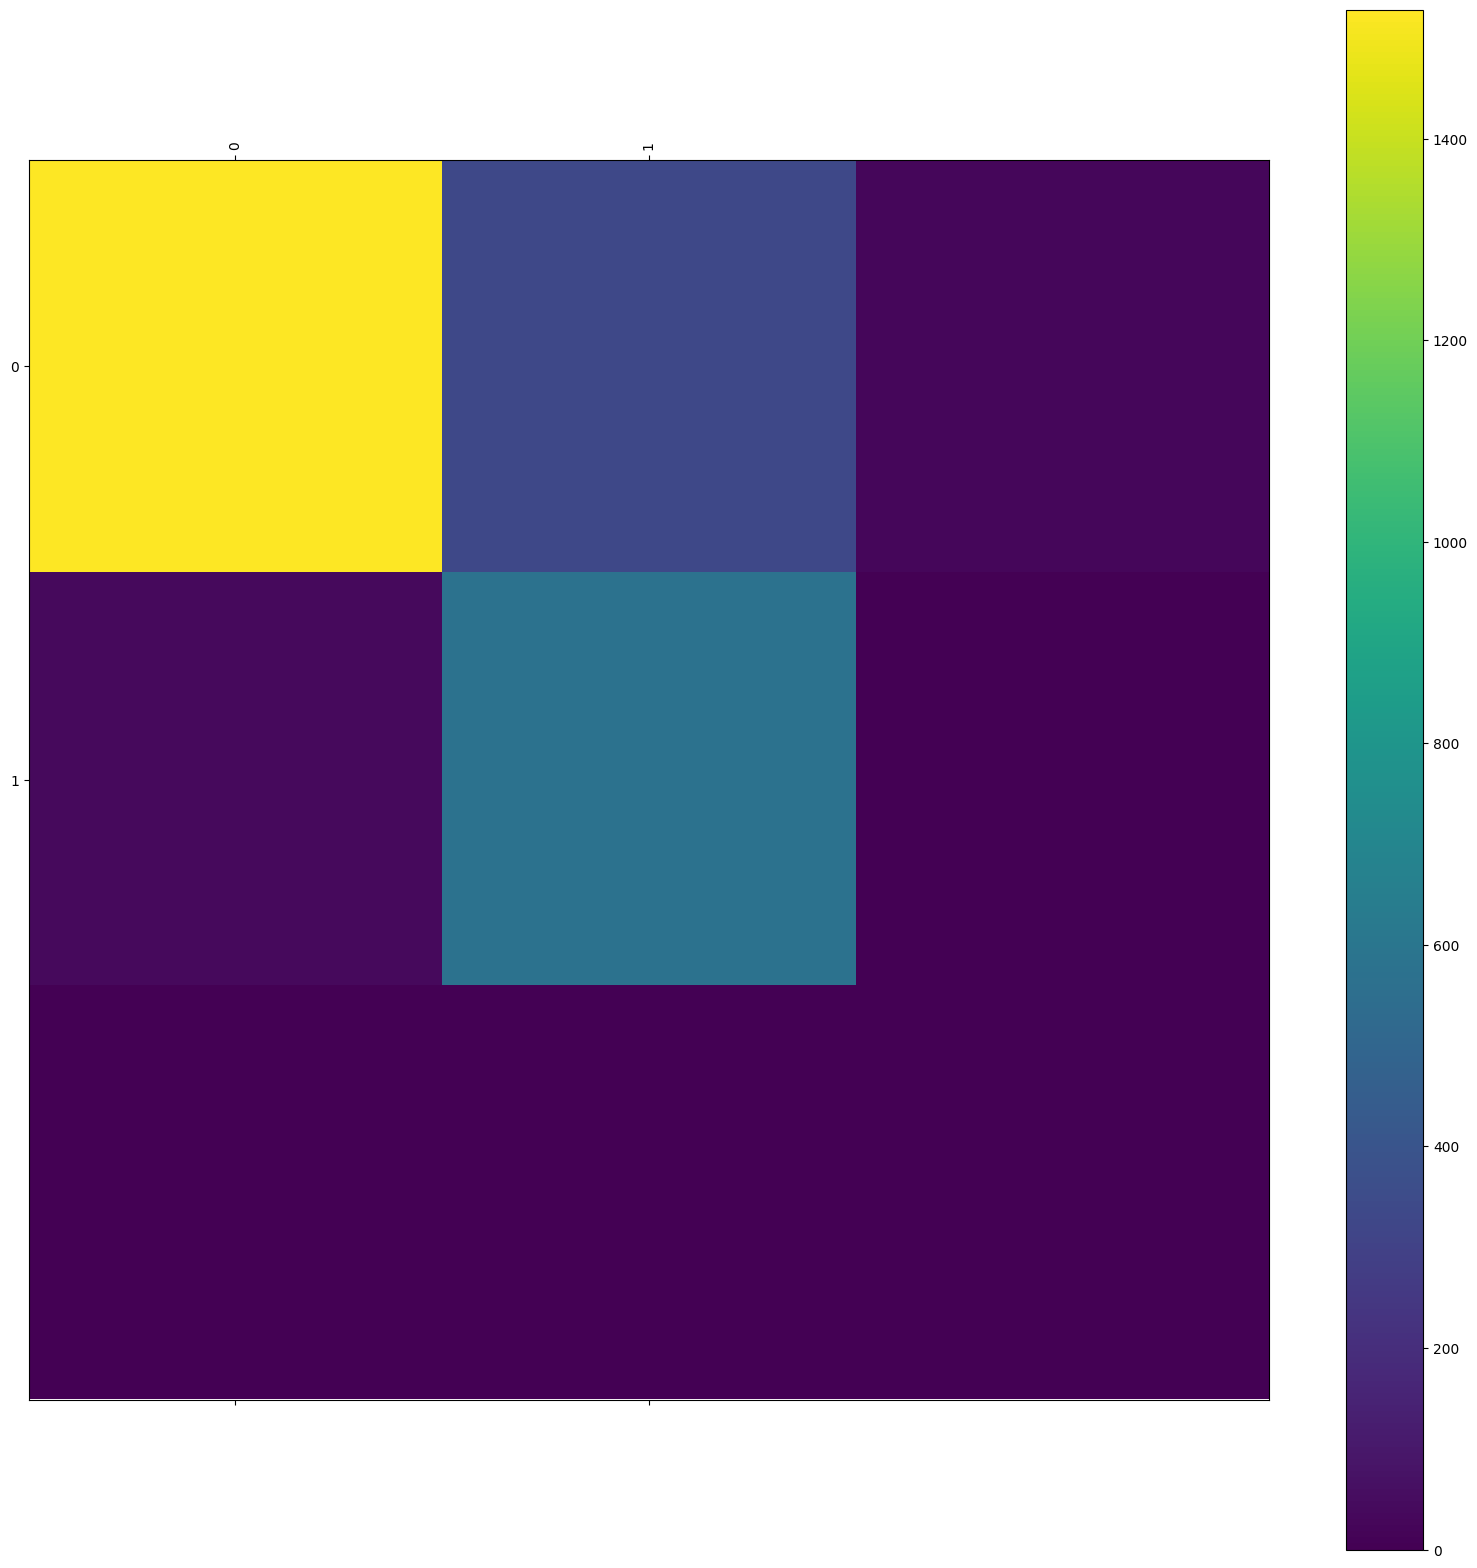

In [10]:
cm = confusion_matrix(y, yh)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(cm, interpolation='nearest')
fig.colorbar(cax)
plt.xticks(rotation=90, ha='center')
plt.xticks(np.arange(0, max(y)+1, 1.0))
plt.yticks(np.arange(0, max(y)+1, 1.0))
ax.set_xticklabels(label_names)
ax.set_yticklabels(label_names)


for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()